In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [2]:
codigo = "2200301"
X = [int(i) for i in codigo]
X = sum(X)
Y = X / 3

# Datos iniciales

# m
L1 = 0.05 * X
L2 = L1 * 1.5
L3 = L1 * 0.5
L = L1 + L2 + L3

#kN
P = 0.05 * X      

#kN / m
W = 0.005 * X + 0.01 * Y

# radianes
angulo_p = np.pi / 4


In [3]:
# Cálculo fuerzas distribuidas a puntuales
x = sp.symbols('x')

f_AC = (W / L1) * x
Puntual_AC = sp.integrate(f_AC ,(x, 0, L1))

f_CD = (W) 
Puntual_CD = sp.integrate(f_CD ,(x, 0, L2))

f_DB = (W / -L3) * x + W
Puntual_DB = sp.integrate(f_DB ,(x, 0, L3))


# ubicación puntuales

Ub_puntual_AC = L1 * 2 / 3
Ub_puntual_CD = (L2 / 2) + L1
Ub_puntual_DB = (L3 * 1 / 3) + L1 + L2


In [4]:
# Estática

Ay = Puntual_AC + Puntual_CD + Puntual_DB - P * np.sin(angulo_p)
MA = Puntual_AC * Ub_puntual_AC + Puntual_CD * Ub_puntual_CD + Puntual_DB * Ub_puntual_DB - P * np.sin(angulo_p) * L
Ay, MA

(-0.222842712474619, -0.300744588302876)

In [5]:
# Fuerzas Internas

V_T1 = -sp.integrate(f_AC) + Ay
V_final_T1 = V_T1.subs(x, 0.4)
V_final_T1

M_T1 = sp.integrate(V_T1) - MA
M_final_T1 = M_T1.subs(x, 0.4)

V_T2 = -f_CD * x + V_final_T1
V_final_T2 = V_T2.subs(x, 0.6)

M_T2 = sp.integrate(V_T2) + M_final_T1
M_final_T2 = M_T2.subs(x, 0.6)

V_T3 = -sp.integrate(f_DB) + V_final_T2
V_final_T3 = V_T3.subs(x, 0.2)

M_T3 = sp.integrate(V_T3) + M_final_T2
M_final_T3 = M_T3.subs(x, 0.2)



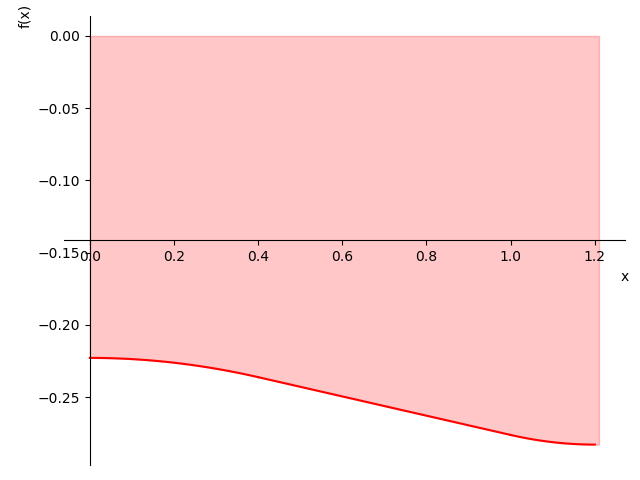

                                           DFC [kN]


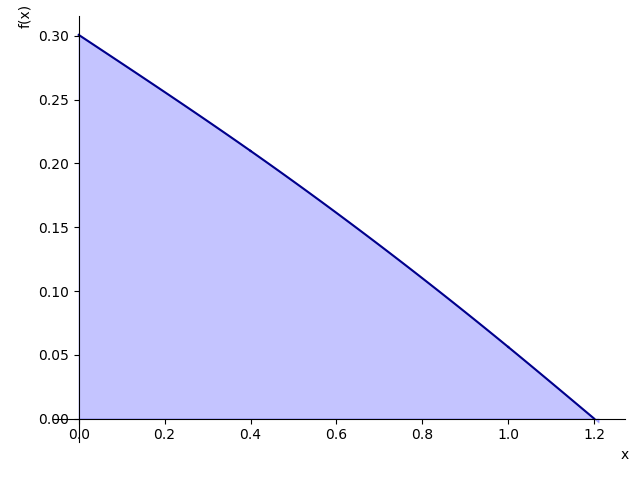

                                            DMF [kNm]


In [53]:
#gráficas
#DFC
cortante_x = np.arange(0, (0.01 + L1 + L2 + L3), 0.01)

T1_cortante = sp.lambdify(x, V_T1)(cortante_x[cortante_x <= L1])
T2_cortante = sp.lambdify(x, V_T2)(cortante_x[(cortante_x > L1) & (cortante_x <= (L1 + L2))] - L1)
T3_cortante = sp.lambdify(x, V_T3)(cortante_x[cortante_x > (L1 + L2)] - (L1 + L2))

cortante_y = np.concatenate((T1_cortante, T2_cortante, T3_cortante))
sp.plot(
    (V_T1, (x, 0 , L1)), (V_T2.subs(x, x - L1), (x, L1, L1 + L2)), (V_T3.subs(x, x - (L1 + L2)), (x, L1 + L2, L1 + L2 + L3)), 
    line_color = 'red', fill={'x': cortante_x, 'y1': cortante_y, 'alpha':0.22, 'color':'red'}
    )
print('                                           DFC [kN]')
#DMF
momento_x = np.arange(0, (0.01 + L1 + L2 + L3), 0.01)

T1_momento = sp.lambdify(x, M_T1)(momento_x[momento_x <= L1])
T2_momento = sp.lambdify(x, M_T2)(momento_x[(momento_x > L1) & (momento_x <= (L1 + L2))] - L1)
T3_momento = sp.lambdify(x, M_T3)(momento_x[momento_x > (L1 + L2)] - (L1 + L2))

momento_y = np.concatenate((T1_momento, T2_momento, T3_momento))
sp.plot(
    (M_T1, (x, 0 , L1)), (M_T2.subs(x, x - L1), (x, L1, L1 + L2)), (M_T3.subs(x, x - (L1 + L2)), (x, L1 + L2, L1 + L2 + L3)), 
    line_color = 'darkblue', fill={'x': momento_x, 'y1': momento_y, 'alpha':0.23, 'color':'blue'}
    )
print('                                            DMF [kNm]')

valores_y_V = cortante_y.tolist()
valores_y_M = momento_y.tolist()

In [62]:
V_max = 0
V_max_pos = np.amax(cortante_y)
V_max_neg = np.amin(cortante_y)
    
if np.abs(V_max_neg) > np.abs(V_max_pos):
    V_max = V_max_neg

else:
    V_max = V_max_pos
pos_Vmax = valores_y_V.index(V_max)
pos_vmax = str(pos_Vmax * 0.01)
    
print('el cortante máximo es : ' + str(round(V_max, 3)) + ' kN y se encuentra a ' + pos_vmax + ' metros')

Momento_max = 0
Momento_max_pos = np.amax(momento_y)
Momento_max_neg = np.amin(momento_y)

if np.abs(Momento_max_pos) < np.abs(Momento_max_neg):
    Momento_max = np.abs(Momento_max_neg)
else:
    Momento_max = Momento_max_pos
pos_Mmax = valores_y_M.index(Momento_max)
pos_Mmax = str(pos_Mmax * 0.01)
print('el momento máximo es : ' + str(round(Momento_max, 3)) + ' kNm y se encuentra a ' + pos_Mmax + ' metros')



el cortante máximo es : -0.283 kN y se encuentra a 1.2 metros
el momento máximo es : 0.301 kNm y se encuentra a 0.0 metros
